In [1]:
import pandas as pd

# Load the dataset provided by the user
file_path = r'C:\Users\gyala\allmynotes\cleaned_file2.csv'
# file_path = r'C:\Users\gyala\Downloads\Book1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,...,Lower Estimate - A wound that splits open after surgery,Higher Estimate - A wound that splits open after surgery,Number of Patients - Accidental cuts and tears from medical treatment,Rate - Accidental cuts and tears from medical treatment,Lower Estimate - Accidental cuts and tears from medical treatment,Higher Estimate - Accidental cuts and tears from medical treatment,Number of Patients - Serious Complications,Rate - Serious Complications,Lower Estimate - Serious Complications,Higher Estimate - Serious Complications
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,...,0.0,1.90,15415.0,3.07,2.28,3.86,NaN,0.68,0.52,0.84
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,...,0.0,2.59,4224.0,1.58,0.08,3.09,NaN,0.48,0.16,0.79
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,0.0,2.97,10672.0,2.94,1.91,3.96,NaN,0.80,0.59,1.02
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,...,0.0,3.05,1878.0,2.06,0.05,4.07,NaN,0.64,0.23,1.05
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,...,NaN,NaN,752.0,1.68,0.00,3.98,NaN,0.57,0.10,1.04


In [2]:
import pandas as pd

# Update the list of relevant columns
relevant_columns = [
    "Hospital Name",
    "Rate - Serious Complications",
    "Rate - Accidental cuts and tears from medical treatment",
    "Rate - A wound that splits open after surgery",
    "Rate - Death from serious treatable complications after surgery",
    "Rate - Collapsed lung due to medical treatment",
    "Rate - Serious blood clots after surgery",
]

# Filter dataset for relevant columns
hospital_data_extended = data[relevant_columns]

# Update rate columns for conversion
rate_columns_extended = [
    "Rate - Serious Complications",
    "Rate - Accidental cuts and tears from medical treatment",
    "Rate - A wound that splits open after surgery",
    "Rate - Death from serious treatable complications after surgery",
    "Rate - Collapsed lung due to medical treatment",
    "Rate - Serious blood clots after surgery",
]

# Convert rate columns to numeric
hospital_data_extended[rate_columns_extended] = hospital_data_extended[rate_columns_extended].apply(
    pd.to_numeric, errors='coerce'
)

# Drop rows with missing rates
hospital_data_extended = hospital_data_extended.dropna(subset=rate_columns_extended)

# Calculate a composite score as the sum of rates (lower is better)
hospital_data_extended['Composite Score'] = hospital_data_extended[rate_columns_extended].sum(axis=1)

# Sort hospitals by composite score (ascending)
best_hospitals_extended = hospital_data_extended.sort_values(by='Composite Score', ascending=True).reset_index(drop=True)

# Display the top 10 hospitals
print("Top 10 Hospitals Based on Composite Scores (Extended Metrics):")
print(best_hospitals_extended.head(10))

# Save the results to a CSV file for further analysis
best_hospitals_extended.to_csv("best_hospitals_extended.csv", index=False)


Top 10 Hospitals Based on Composite Scores (Extended Metrics):
                                   Hospital Name  \
0                           MAYO CLINIC HOSPITAL   
1                       PALOS COMMUNITY HOSPITAL   
2                 MAYO CLINIC METHODIST HOSPITAL   
3                      FAWCETT MEMORIAL HOSPITAL   
4        PROVIDENCE HOSPITAL AND MEDICAL CENTERS   
5                ALEXIAN BROTHERS MEDICAL CENTER   
6  ST JOHN MACOMB-OAKLAND HOSPITAL-MACOMB CENTER   
7                          DELRAY MEDICAL CENTER   
8                     NORTH KANSAS CITY HOSPITAL   
9               AURORA WEST ALLIS MEDICAL CENTER   

   Rate - Serious Complications  \
0                          0.47   
1                          0.42   
2                          0.33   
3                          0.59   
4                          0.62   
5                          0.57   
6                          0.52   
7                          0.34   
8                          0.64   
9             

C:\Users\gyala\AppData\Local\Temp\ipykernel_31376\2561467424.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data_extended[rate_columns_extended] = hospital_data_extended[rate_columns_extended].apply(


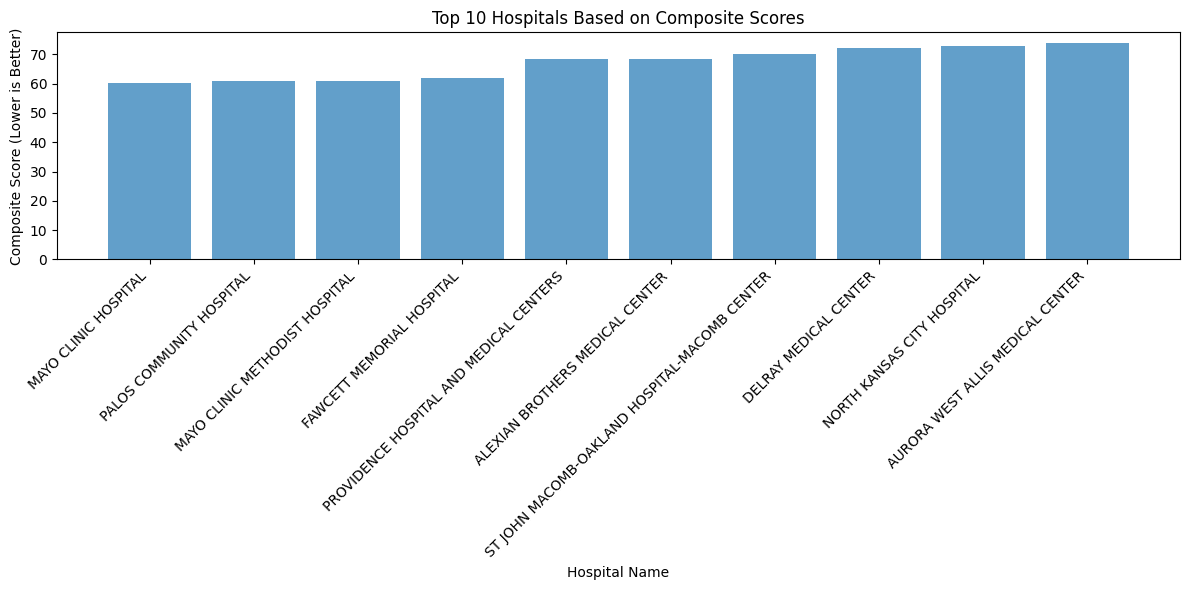

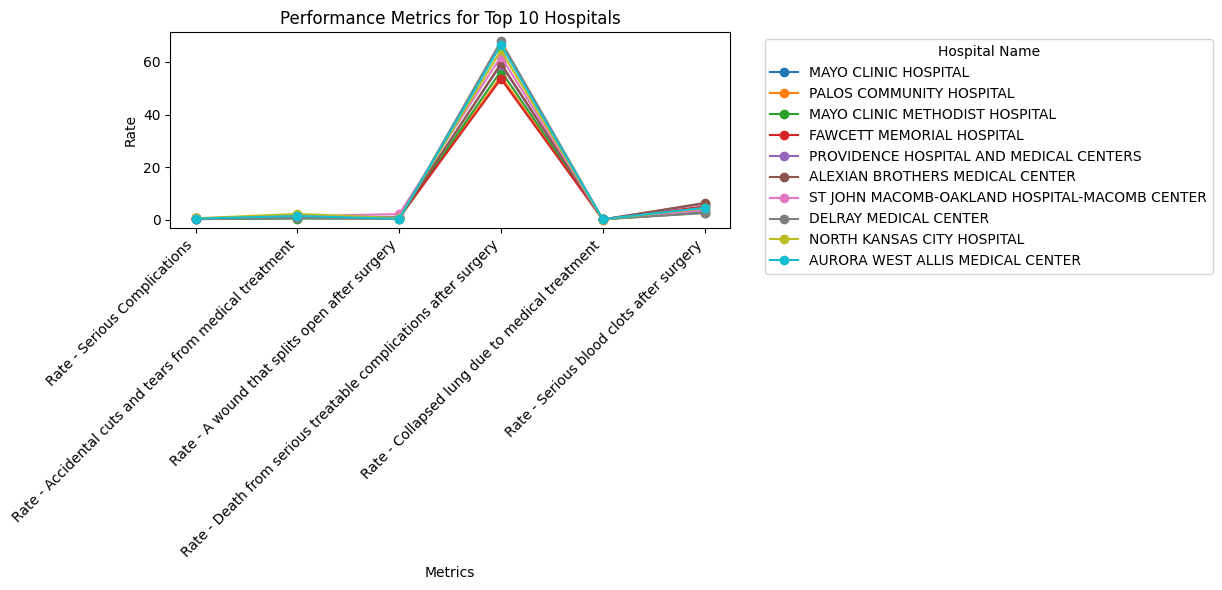

In [3]:
import matplotlib.pyplot as plt

# Select top 10 hospitals for visualization
top_10_hospitals = best_hospitals_extended.head(10)

# Visualization of composite scores for top hospitals
plt.figure(figsize=(12, 6))
plt.bar(top_10_hospitals["Hospital Name"], top_10_hospitals["Composite Score"], alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Hospitals Based on Composite Scores")
plt.ylabel("Composite Score (Lower is Better)")
plt.xlabel("Hospital Name")
plt.tight_layout()
plt.show()

# Visualization of individual metric contributions for top hospitals
top_10_hospitals_melted = top_10_hospitals.melt(
    id_vars=["Hospital Name", "Composite Score"],
    value_vars=rate_columns_extended,
    var_name="Metric",
    value_name="Rate"
)

plt.figure(figsize=(12, 6))
for hospital in top_10_hospitals["Hospital Name"]:
    hospital_data = top_10_hospitals_melted[top_10_hospitals_melted["Hospital Name"] == hospital]
    plt.plot(hospital_data["Metric"], hospital_data["Rate"], marker='o', label=hospital)

plt.xticks(rotation=45, ha='right')
plt.title("Performance Metrics for Top 10 Hospitals")
plt.ylabel("Rate")
plt.xlabel("Metrics")
plt.legend(title="Hospital Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
